In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [2]:
df = pd.read_json("Appliances.json", lines = True)

In [3]:
# initial preprocessing

# Fill missing values in 'style,' 'reviewerName,' 'reviewText,' and 'summary' with empty strings
columns_to_fill = ['style', 'reviewerName', 'reviewText', 'summary']
df[columns_to_fill] = df[columns_to_fill].astype(str)
df[columns_to_fill] = df[columns_to_fill].replace('', np.nan)

# Convert 'vote' to numeric (assuming 'NaN' means 0)
df['vote'] = df['vote'].str.replace(',', '', regex=True).fillna(0).astype(int)

# Convert reviewTime
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format = '%m %d, %Y')

# Delete the 'image' column
df.drop('image', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602777 entries, 0 to 602776
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         602777 non-null  int64         
 1   vote            602777 non-null  int64         
 2   verified        602777 non-null  bool          
 3   reviewTime      602777 non-null  datetime64[ns]
 4   reviewerID      602777 non-null  object        
 5   asin            602777 non-null  object        
 6   style           602777 non-null  object        
 7   reviewerName    602777 non-null  object        
 8   reviewText      602777 non-null  object        
 9   summary         602777 non-null  object        
 10  unixReviewTime  602777 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(6)
memory usage: 46.6+ MB


In [5]:
def tfidf_process_text(data, text_column):
    """
    Perform TF-IDF processing on a text column of a DataFrame.

    Parameters:
    data (DataFrame): The input DataFrame containing the text data.
    text_column (str): The name of the text column to process.

    Returns:
    csr_matrix: The TF-IDF matrix for the specified text column.
    TfidfVectorizer: The fitted TfidfVectorizer instance for reference.
    """
    # Create a TfidfVectorizer instance
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the specified text column
    tfidf_matrix = tfidf_vectorizer.fit_transform(data[text_column])

    return tfidf_matrix, tfidf_vectorizer

In [6]:
tfidf_matrix_review, tfidf_vectorizer_review = tfidf_process_text(df, 'reviewText')
tfidf_matrix_summary, tfidf_vectorizer_summary = tfidf_process_text(df, 'summary')

In [7]:
# Print the TF-IDF Matrices for the First Two Rows
print("TF-IDF Matrix for 'reviewText' (First Two Rows):")
print(tfidf_matrix_review[:2].toarray())

print("\nTF-IDF Matrix for 'summary' (First Two Rows):")
print(tfidf_matrix_summary[:2].toarray())

TF-IDF Matrix for 'reviewText' (First Two Rows):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

TF-IDF Matrix for 'summary' (First Two Rows):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


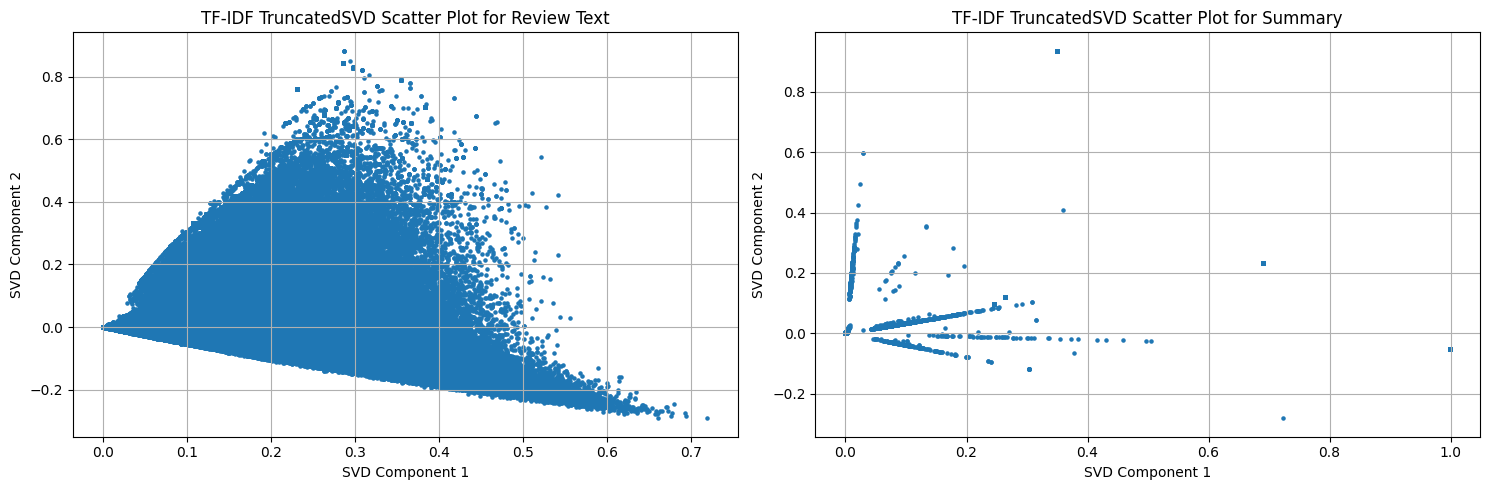

In [10]:
# Visualisation of TFID results

# Perform TruncatedSVD to reduce dimensionality (you can adjust the number of components)
svd = TruncatedSVD(n_components=2)

# Perform TruncatedSVD on 'reviewText' TF-IDF matrix
tfidf_svd_review = svd.fit_transform(tfidf_matrix_review)

# Perform TruncatedSVD on 'summary' TF-IDF matrix
tfidf_svd_summary = svd.fit_transform(tfidf_matrix_summary)

# Create subplots for the scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for 'reviewText'
ax1.scatter(tfidf_svd_review[:, 0], tfidf_svd_review[:, 1], marker='o', s=5)
ax1.set_title('TF-IDF TruncatedSVD Scatter Plot for Review Text')
ax1.set_xlabel('SVD Component 1')
ax1.set_ylabel('SVD Component 2')
ax1.grid(True)

# Scatter plot for 'summary'
ax2.scatter(tfidf_svd_summary[:, 0], tfidf_svd_summary[:, 1], marker='o', s=5)
ax2.set_title('TF-IDF TruncatedSVD Scatter Plot for Summary')
ax2.set_xlabel('SVD Component 1')
ax2.set_ylabel('SVD Component 2')
ax2.grid(True)

plt.tight_layout()
plt.show()